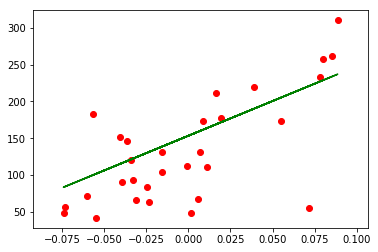

In [3]:
# LINEAR REGRESSION
#  dự đoán bệnh đái đường (diabetes) 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
diabetes = datasets.load_diabetes()
# print(diabetes)
diabetes_X = diabetes.data[:,np.newaxis,2]
# print(diabetes_X)
diabetes_X_train = diabetes_X[:-30]
diabetes_X_test  = diabetes_X[-30:]
# print("diabetes_X_test:",diabetes_X_test)
diabetes_y = diabetes.target
diabetes_y_train =diabetes_y[:-30]
diabetes_y_test = diabetes_y[-30:]
# print('diabetes_y_test',diabetes_y_test)
regrr = linear_model.LinearRegression()
model = regrr.fit(diabetes_X_train,diabetes_y_train)
y_predict = model.predict(diabetes_X_test)
regrr.coef_
mean_squared_error(diabetes_y_test, y_predict)
r2_score(diabetes_y_test, y_predict)# variance
plt.scatter(diabetes_X_test, diabetes_y_test,c='r')
plt.plot(diabetes_X_test, y_predict, c='g')
plt.show()

[-7.         -6.94927536 -6.89855072 -6.84782609 -6.79710145 -6.74637681
 -6.69565217 -6.64492754 -6.5942029  -6.54347826 -6.49275362 -6.44202899
 -6.39130435 -6.34057971 -6.28985507 -6.23913043 -6.1884058  -6.13768116
 -6.08695652 -6.03623188 -5.98550725 -5.93478261 -5.88405797 -5.83333333
 -5.7826087  -5.73188406 -5.68115942 -5.63043478 -5.57971014 -5.52898551
 -5.47826087 -5.42753623 -5.37681159 -5.32608696 -5.27536232 -5.22463768
 -5.17391304 -5.12318841 -5.07246377 -5.02173913 -4.97101449 -4.92028986
 -4.86956522 -4.81884058 -4.76811594 -4.7173913  -4.66666667 -4.61594203
 -4.56521739 -4.51449275 -4.46376812 -4.41304348 -4.36231884 -4.3115942
 -4.26086957 -4.21014493 -4.15942029 -4.10869565 -4.05797101 -4.00724638
 -3.95652174 -3.9057971  -3.85507246 -3.80434783 -3.75362319 -3.70289855
 -3.65217391 -3.60144928 -3.55072464 -3.5        -3.44927536 -3.39855072
 -3.34782609 -3.29710145 -3.24637681 -3.19565217 -3.14492754 -3.0942029
 -3.04347826 -2.99275362 -2.94202899 -2.89130435 -2.8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


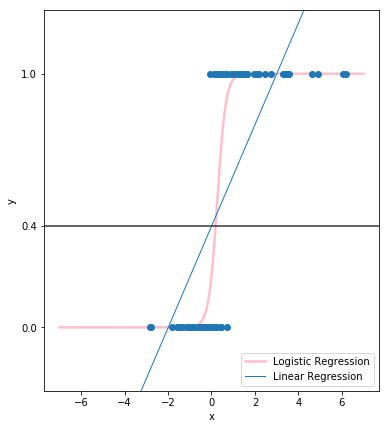

In [120]:
# lOGISTIC REGRESSION
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
xmin, xmax =-7,7
n_sample =77
x = np.random.normal(size= n_sample)
# print(x)
y =(x>0).astype(np.float)
# print(y)
x[x>0] *=3
x += 0.4*np.random.normal(size =n_sample)
# print(x)
x= x[:,np.newaxis]
# print(x)
clf = linear_model.LogisticRegression(C=1e4) # classifer
clf.fit(x,y)
# print(clf)
plt.figure(1, figsize=(6,7))
plt.clf()
plt.scatter(x.ravel(), y,zorder=17)
x_test =np.linspace(-7,7,277)
print(x_test)
# sigmod
def model(x):
    return 1/(1+np.exp(-x))
loss = model(x_test*clf.coef_+ clf.intercept_).ravel()
print(loss)
plt.plot(x_test, loss, c='pink', linewidth=2.5)
ols = linear_model.LinearRegression()
ols.fit(x,y)
plt.plot(x_test, ols.coef_*x_test + ols.intercept_, linewidth=1)
plt.axhline(.4, color='.2') # gach ngang
plt.ylabel('y')
plt.xlabel('x')
plt.yticks([0,0.4,1])
plt.ylim(-0.25,1.25)
plt.legend(('Logistic Regression','Linear Regression'),loc='lower right')
plt.show()

In [197]:
# DECISION TREE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
df = pd.read_csv('dataset_11_balance-scale.csv')
def importdata(df):
    print(len(df))
    print(df.head())
    print(df.shape)
    return df
def splitdataset(df):
    x =df.values[:,0:4]
    y = df.values[:,4]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
    return x,y,x_train, x_test, y_train, y_test

def train_gini (x_train, x_test, y_train): # train with giniIndex
    clf_gini = DecisionTreeClassifier(criterion ='gini', random_state=100,max_depth =3, min_samples_leaf =5 )
    clf_gini.fit(x_train, y_train)
    return clf_gini
def train_entropy(x_train, x_test, y_train):
    clf_entropy =DecisionTreeClassifier( criterion ='entropy', random_state =100, max_depth=3, min_samples_leaf =5)
    clf_entropy.fit(x_train, y_train)
    return clf_entropy
def predict( x_test, model):# predict
    predict = model.predict(x_test)
    print(f"predict value:{predict}")
    return predict
def cal_accuracy(y_test, predict):# calculating accuracy
    print("confusion_matrix:\n",confusion_matrix(y_test, predict))
    print("accuracy_score:\n", accuracy_score(y_test, predict))
    print("classification_report\n", classification_report(y_test, predict))
# importdata(df)
# split dataset
x,y,x_train, x_test, y_train, y_test = splitdataset(df)
# model = regrr.fit(x_train,y_train)
clf_gini = train_gini(x_train, x_test, y_train)
clf_entropy = train_entropy(x_train, x_test, y_train)
# predict
y_predict_gini = predict( x_test, clf_gini)# chuan gini
y_predict_entropy = predict(x_test, clf_entropy)
# accuracy score
cal_accuracy(y_test, y_predict_gini)
cal_accuracy(y_test, y_predict_entropy)

predict value:['R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'L'
 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'R'
 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'L' 'R'
 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'L' 'L'
 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'L'
 'L' 'L' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R'
 'L' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'R']
predict value:['R' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' '

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[ 7.37744463e-01  4.28276041e+00]
 [ 2.12883772e+00  7.43467756e-01]
 [ 8.16490467e-01  4.45180968e+00]
 [ 1.66935855e+00  4.57758777e+00]
 [ 2.43954488e+00  1.42928880e+00]
 [ 1.16152221e+00  4.41542563e+00]
 [ 5.25539755e-01  4.01151623e+00]
 [ 7.90831689e-01  4.49637992e+00]
 [ 2.38339624e+00  1.44164308e+00]
 [ 2.05475970e+00  4.27421746e+00]
 [ 5.62572942e-01  4.57642513e+00]
 [ 6.54906213e-01  4.02796742e+00]
 [ 2.73913845e-01  4.48416111e+00]
 [ 2.90198393e+00  2.53312299e-01]
 [ 9.91722299e-01  3.64110129e+00]
 [ 1.95845959e+00  1.50496813e+00]
 [ 9.69997234e-01  4.36815859e+00]
 [ 1.40229820e+00  8.70809998e-01]
 [ 2.06369233e+00  9.37445443e-01]
 [ 1.04293948e+00  4.55779990e+00]
 [ 8.37105219e-01  4.36632692e+00]
 [ 1.78818243e+00  1.57043236e+00]
 [ 2.25474363e+00  1.31685252e+00]
 [ 7.48545257e-01  4.41174907e+00]
 [ 2.05080928e+00  9.02263220e-01]
 [ 2.58638060e+00  8.57151065e-01]
 [ 8.69176664e-01  3.85258279e+00]
 [ 1.73401097e+00  7.11928583e-01]
 [ 1.22190183e+00  4

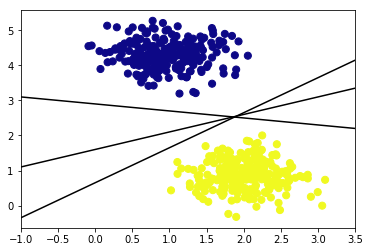

In [223]:
# SUPPORT VERTOR MACHINE
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples=500, centers =2, random_state =0, cluster_std=0.4)
print(x,y)
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap='plasma')

import numpy as np
xfit = np.linspace(-1,3.5)
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    print("m:{},b:{},d:{}".format(m,b,d))
    yfit = m*xfit +b
    plt.plot(xfit,yfit,'-k')
plt.xlim(-1,3.5)
plt.show()

In [244]:
# Navie Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state =0)
gnb = GaussianNB()
mnb = MultinomialNB()
# model
model_gnb = gnb.fit(x_train, y_train)
model_mnb = mnb.fit(x_train, y_train)
y_predict_gnb = model_gnb.predict(x_test)
y_predict_mnb = model_mnb.predict(x_test)
print(y_predict_gnb,y_test)
print(y_predict_mnb, y_test)
cnf_matrix_gnb = confusion_matrix(y_test, y_predict_gnb)
cnf_matrix_mnb = confusion_matrix(y_test, y_predict_mnb)
print(cnf_matrix_gnb)
print(cnf_matrix_mnb)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0] [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 2 2 0 2 2 0 2 2 2 0
 2 2 2 2 0 2 0 0] [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
[[16  0  0]
 [ 0  0 18]
 [ 0  0 11]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
45
[0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 0.9777777777777777, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


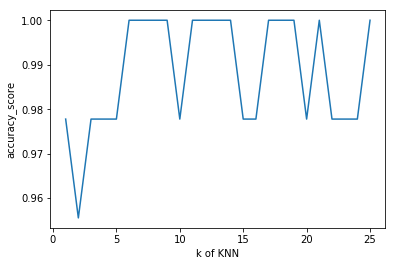

In [306]:
# KNN ( K-nearest Neighbor)
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state =10)
log = LogisticRegression()
model_log = log.fit(x_train, y_train)
print(model_log)
y_predict_log = model_log.predict(x_test)
print(len(y_predict_log))
accuracy_score(y_test, y_predict_log)

# knn = KNeighborsClassifier(n_neighbors=5)
# model_knn = knn.fit(x_train,y_train)
# y_predict_knn = model2.predict(x_test)
# accuracy_score(y_test, y_predict_knn)
# 
k_range = range(1,26)
score =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    model_knn = knn.fit(x_train, y_train)
    y_predict_knn = model_knn.predict(x_test)
    score.append(accuracy_score(y_test, y_predict_knn))
print(score)
plt.plot(k_range, score)
plt.xlabel('k of KNN')
plt.ylabel('accuracy_score')
plt.show()

[[10.5  11.  ]
 [ 1.34  2.68]
 [ 6.5   8.  ]]
[1 2 1 2 0 1 1 0 1]
[1. 2.] 1
[5. 8.] 2
[1.5 1.8] 1
[8. 8.] 2
[ 9. 11.] 0
[1.  0.6] 1
[2. 3.] 1
[12. 11.] 0
[1.2 6. ] 1


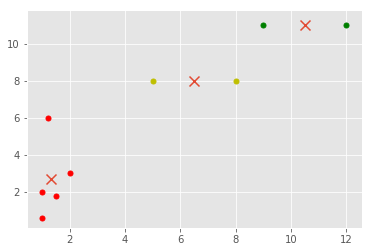

In [377]:
# K-Mean (Clustering)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import style
style.use('ggplot')
x=np.array([[1,2],[5,8],[1.5,1.8],[8,8],[9,11],[1,0.6],[2,3],[12,11],[1.2,6]])
kmean = KMeans(n_clusters  =3) #So phan vung la 2
kmean.fit(x)# model
centroids = kmean.cluster_centers_ # tim trung tam phan vung
print(centroids)
label = kmean.labels_ # en-coding
print(label)
color =['g.','r.','y.','c*']
for i in range(len(x)):
    print(x[i],label[i])
    plt.plot(x[i][0],x[i][1], color[label[i]], markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s =100)
# plt.grid()
plt.show()


[ 4.43722938e+00  2.70511179e+00  3.53878881e+00  2.75052591e+00
  4.20064243e+00  2.23550538e+00  3.69798052e+00  2.30507892e+00
  4.52945908e+00  4.34913058e+00  4.64031173e+00  4.78814208e+00
  4.73889594e+00  4.39369356e+00  4.59396286e+00  2.85130326e+00
  7.79398063e-01  4.97949522e+00  4.45231959e+00  3.12444777e+00
  3.83768467e+00  4.07102743e+00  3.24739658e+00  4.09572620e+00
  3.29016157e+00  5.18730369e+00  4.20984884e+00  4.45073187e+00
  2.53140438e+00  4.25548648e+00  4.03783721e+00  3.04793821e+00
  2.50542016e+00  3.82136278e+00  3.88759297e+00  3.76396503e+00
  4.32269313e+00  4.08435636e+00  4.25071948e+00  4.35172723e+00
  3.78648961e+00  3.23584534e+00  3.06400931e+00  3.67130980e+00
  3.38480537e+00  3.86428829e+00  4.13620044e+00  3.51290798e+00
  2.35592228e+00  3.57566855e+00  3.95011460e+00  4.36505299e+00
  4.19065293e+00  4.86004961e+00  4.50195393e+00  2.74278567e+00
  4.65611210e+00  3.26436083e+00  4.45070067e+00  3.78327441e+00
  1.73978260e+00  3.72012

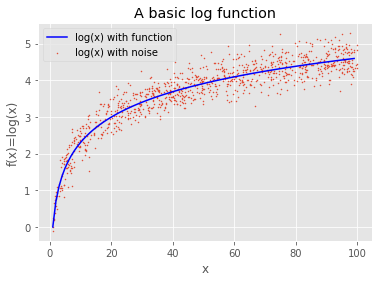

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


preds,setosa,versicolor,virginica
actual,,,
setosa,16,0,0
versicolor,0,16,0
virginica,0,0,9


In [407]:
# RANDOM FOREST
import numpy as np
import pylab as pl
import pandas as pd
x = np.random.uniform(1,100,1000)
y = np.log(x) +  np.random.normal(0,.3,1000)
print(y)
plt.scatter(x,y,s=1, label='log(x) with noise')
plt.plot(np.arange(1,100),np.log(np.arange(1,100)),c='b',label='log(x) with function')
plt.xlabel('x')
plt.ylabel('f(x)=log(x)')
plt.legend(loc='best')
plt.title('A basic log function')
plt.show()
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
iris
df = pd.DataFrame(iris.data,columns=iris.feature_names)
# df.head()
df['is_train']=np.random.uniform(0,1,len(df))<=.75
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)
df.head()
train,test=df[df['is_train']==True],df[df['is_train']==False]
features=df.columns[:4]
clf=RandomForestClassifier(n_jobs=2)
y,_=pd.factorize(train['species'])
clf.fit(train[features],y)# model
# predict
preds=iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'],preds,rownames=['actual'],colnames=['preds'])